<a href="https://colab.research.google.com/github/SahilKadaskar/AAI/blob/main/BlockWordProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial state:
A is on table
B is on A
C is on table
D is on B


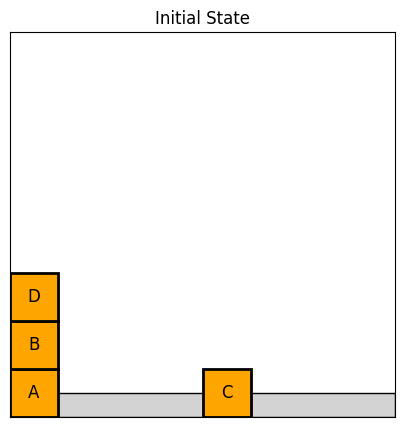


Goal state:
A is on table
B is on A
C is on table
D is on B


<Figure size 640x480 with 0 Axes>


Executing plan:
Moved B from A to table
A is on table
B is on table
C is on table
D is on B


<Figure size 640x480 with 0 Axes>

Moved C from table to A
A is on table
B is on table
C is on A
D is on B


<Figure size 640x480 with 0 Axes>

Moved D from B to C
A is on table
B is on table
C is on A
D is on C


<Figure size 640x480 with 0 Axes>

Goal state reached!


<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Ensure inline plotting in Jupyter/Colab
%matplotlib inline

class BlockWorld:
    def __init__(self, blocks, initial_state, goal_state):
        self.blocks = blocks  # List of blocks
        self.initial_state = initial_state  # Initial configuration
        self.goal_state = goal_state  # Goal configuration
        self.state = initial_state  # Current configuration
        self.fig, self.ax = plt.subplots(figsize=(5, 5))  # Create a figure and axes for plotting
        self.block_size = 1  # Size of each block in the visualization
        self.table_height = 0.5  # Height of the table
        self.block_height = 1.0  # Height of each block

    def plot_table(self):
        """Plot the table where the blocks rest."""
        table = patches.Rectangle((0, 0), len(self.blocks) * 2, self.table_height, linewidth=1, edgecolor='black', facecolor='lightgrey')
        self.ax.add_patch(table)

    def plot_block(self, block, x, y):
        """Plot a block at the given position."""
        rect = patches.Rectangle((x, y), self.block_size, self.block_height, linewidth=2, edgecolor='black', facecolor='orange')
        self.ax.add_patch(rect)
        self.ax.text(x + self.block_size / 2, y + self.block_height / 2, block, color='black', ha='center', va='center', fontsize=12)

    def clear_plot(self):
        """Clear the plot before redrawing."""
        self.ax.clear()
        self.ax.set_xlim(0, len(self.blocks) * 2)
        self.ax.set_ylim(0, len(self.blocks) * 2)
        self.ax.set_aspect('equal')
        self.ax.set_xticks([])  # Hide x-axis ticks
        self.ax.set_yticks([])  # Hide y-axis ticks

    def print_state(self):
        """Prints the current state of the blocks."""
        for block in self.blocks:
            position = self.state.get(block, 'table')  # If block is on table, it's 'table'
            print(f"{block} is on {position}")

    def move(self, block, from_position, to_position):
        """Move a block from one position to another."""
        if self.state.get(block) == from_position:
            self.state[block] = to_position
            print(f"Moved {block} from {from_position} to {to_position}")
        else:
            print(f"Cannot move {block}, it's not at {from_position}!")

    def is_goal_reached(self):
        """Check if the current state matches the goal state."""
        return self.state == self.goal_state

    def plot_state(self, state, title="State"):
        """Plot the state of the blocks."""
        self.clear_plot()
        self.plot_table()

        block_positions = {}  # Keep track of the block positions to handle stacking

        # Position each block based on its state
        for i, block in enumerate(self.blocks):
            y_offset = 0  # Start at the table level
            if state.get(block) == 'table':
                x_offset = i * 2  # Space out the blocks on the table
            else:
                # If the block is on another block, calculate the stacking position
                below_block = state.get(block)
                x_offset, y_offset = block_positions[below_block]
                y_offset += self.block_height  # Stack the block on top

            # Store the position of the block
            block_positions[block] = (x_offset, y_offset)

            # Plot the block at its calculated position
            self.plot_block(block, x_offset, y_offset)

        self.ax.set_title(title)
        plt.pause(1)  # Pause to update the plot
        plt.draw()  # Redraw the plot

    def plan(self):
        """Generate a sequence of actions to reach the goal state."""
        actions = []
        for block in self.blocks:
            current_position = self.state.get(block, 'table')
            goal_position = self.goal_state.get(block, 'table')

            if current_position != goal_position:
                actions.append((block, current_position, goal_position))

        return actions

    def execute_plan(self):
        """Execute the plan (sequence of actions)."""
        actions = self.plan()
        if not actions:
            print("Already at the goal state!")
            return

        for block, current_position, goal_position in actions:
            self.move(block, current_position, goal_position)
            self.print_state()
            self.plot_state(self.state, "Current State")
            if self.is_goal_reached():
                print("Goal state reached!")
                return


# Define the blocks
blocks = ['A', 'B', 'C','D']

# Define the initial state (represented as a dictionary)
initial_state = {'A': 'table', 'B': 'A','D':'B', 'C': 'table'}

# Define the goal state
goal_state = {'A': 'table', 'B': 'table', 'C': 'A','D':'C'}

# Create an instance of the BlockWorld class
block_world = BlockWorld(blocks, initial_state, goal_state)

# Print the initial state and plot the configuration
print("Initial state:")
block_world.print_state()
block_world.plot_state(initial_state, "Initial State")

# Print the goal state and plot the goal configuration
print("\nGoal state:")
block_world.print_state()
block_world.plot_state(goal_state, "Goal State")

# Execute the plan to reach the goal state
print("\nExecuting plan:")
block_world.execute_plan()

# Display the plot after completing the task
plt.show()
